In [1]:
# refs:
# https://cs.stackexchange.com/questions/9133/finding-a-source-of-a-directed-acyclic-graph-in-linear-time
# https://networkx.org/nx-guides/content/algorithms/dag/index.html

In [9]:
from typing import List

import networkx as nx
import matplotlib.pyplot as plt

In [5]:
clothing_graph = nx.read_graphml("clothing_graph.graphml")

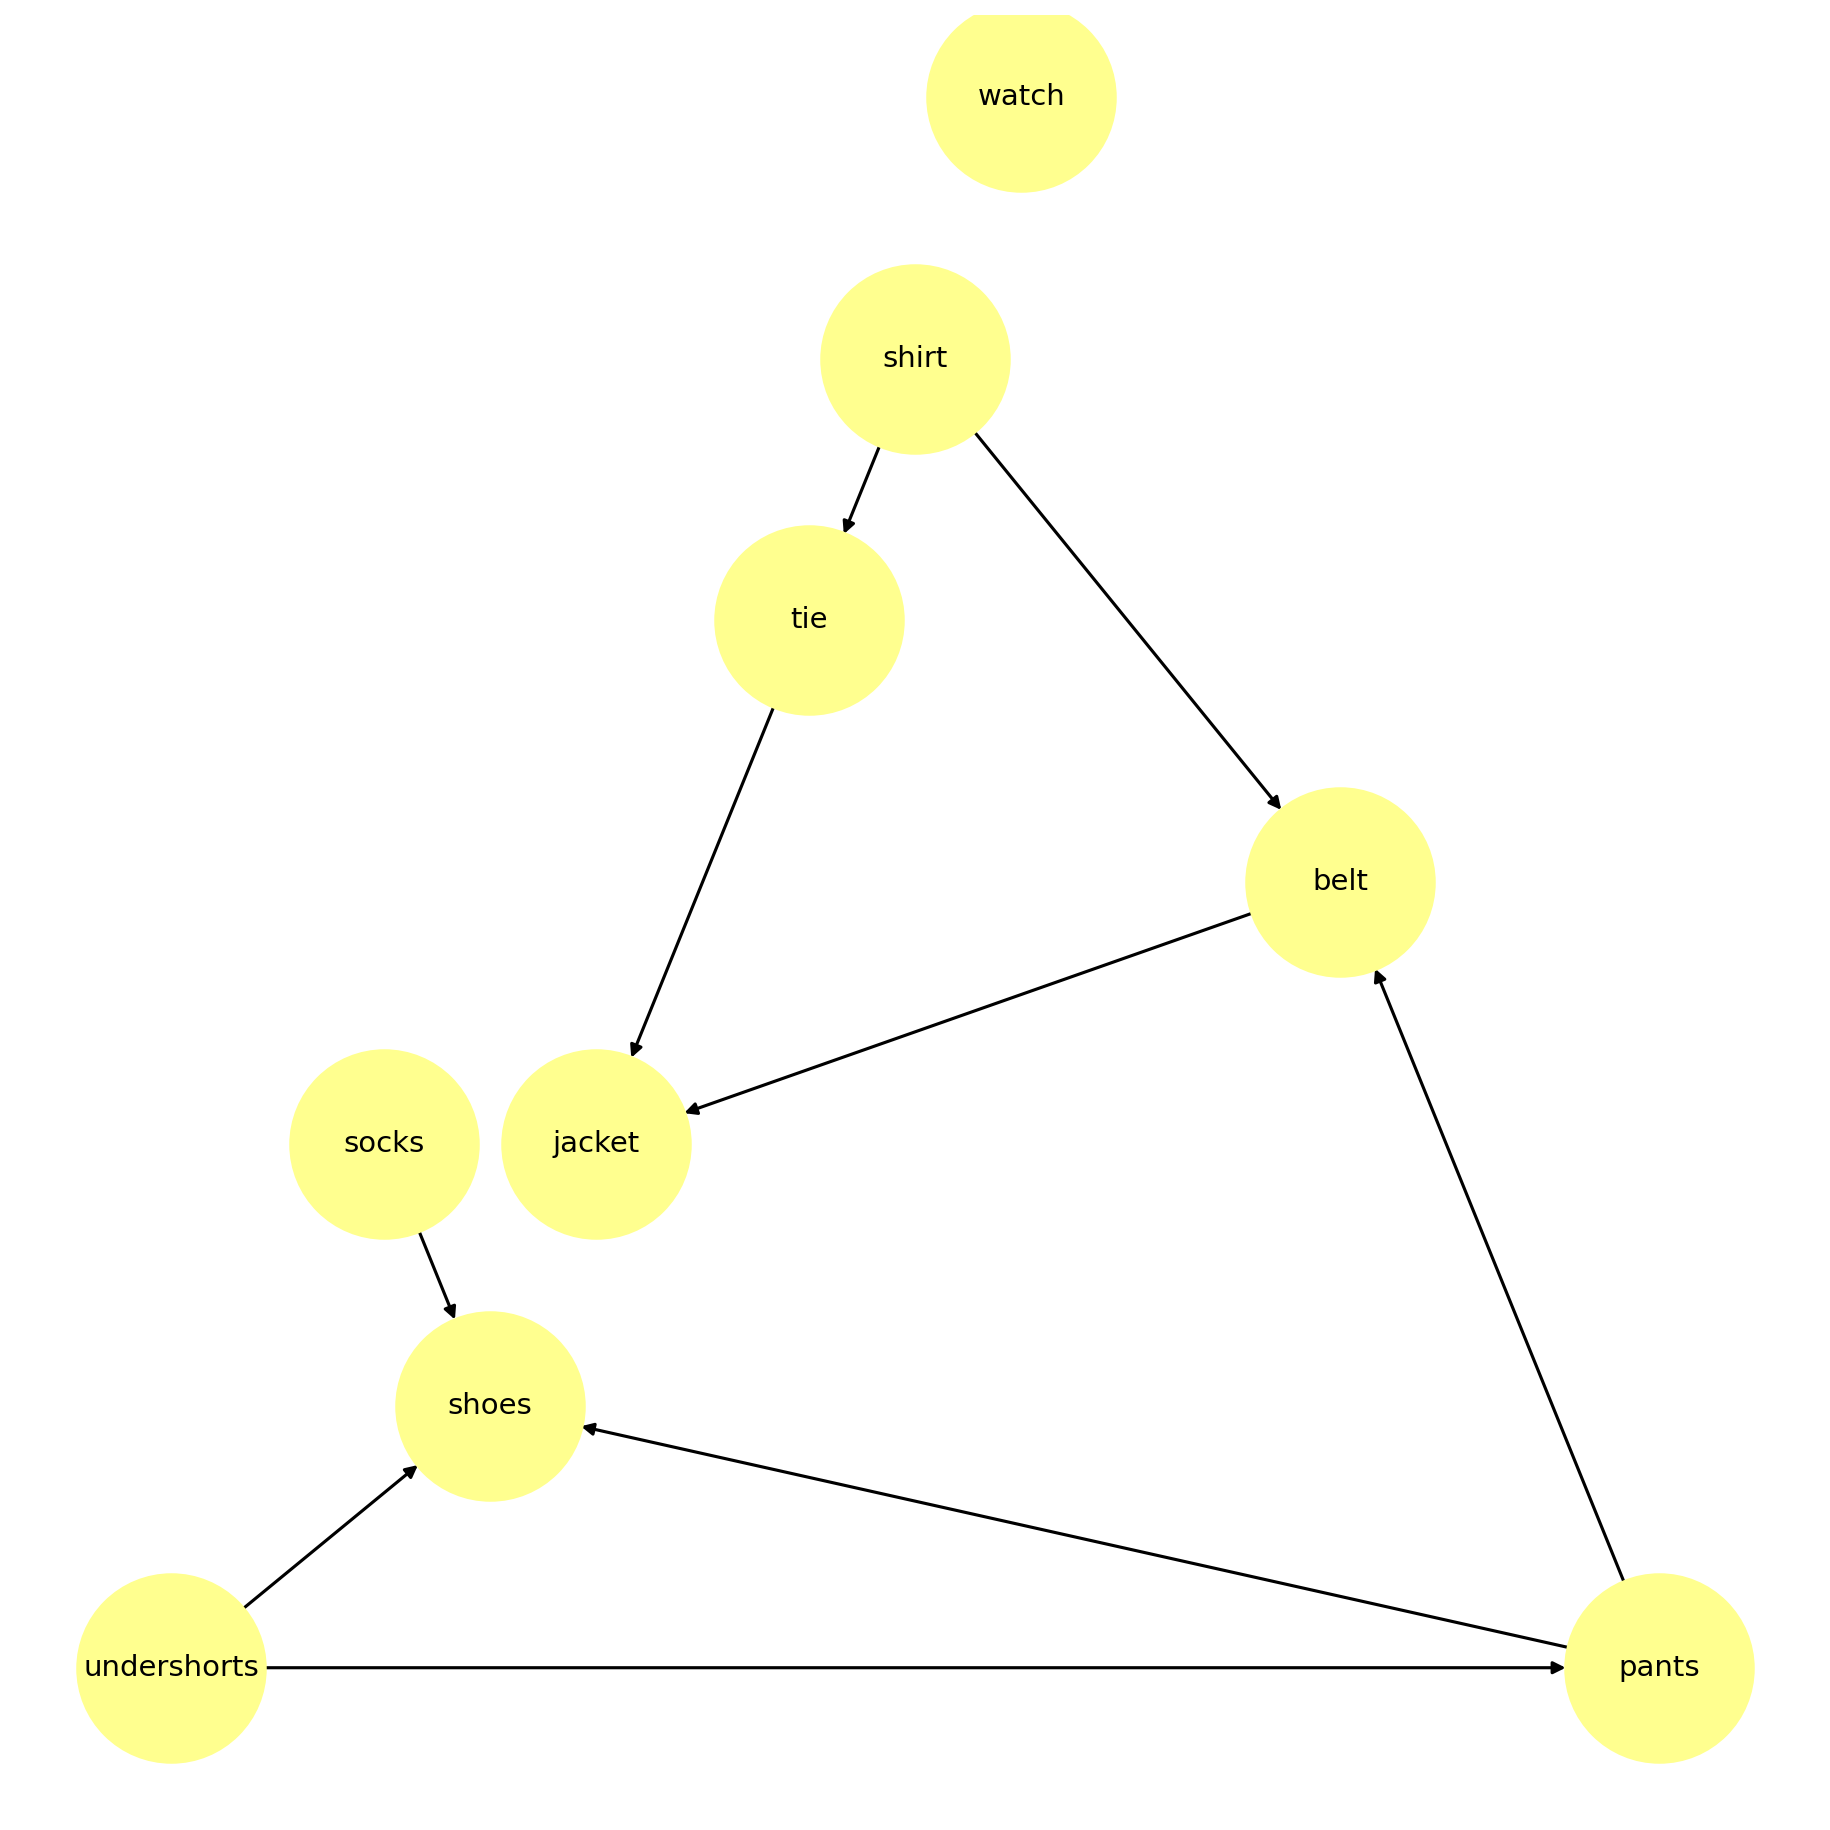

In [6]:
plt.figure(figsize=(12, 12), dpi=150)
nx.draw_planar(
    clothing_graph,
    arrowsize=12,
    with_labels=True,
    node_size=8000,
    node_color="#ffff8f",
    linewidths=2.0,
    width=1.5,
    font_size=14,
)

In [7]:
# is it a DAG?
nx.is_directed_acyclic_graph(clothing_graph)

True

## Topological Sort

... is a linear ordering of vertices such that for every directed edge `u -> v`, vertex `u` comes before `v` in the ordering. If there is a cycle in the graph, then there is no topological ordering, thus DAGs (Directed Acyclic Graphs) are the only graphs that have a topological ordering. Kahn's algorithm is a popular algorithm to find the topological ordering of a DAG.

In [8]:
list(nx.topological_sort(clothing_graph))

['undershorts',
 'shirt',
 'socks',
 'watch',
 'pants',
 'tie',
 'belt',
 'shoes',
 'jacket']

## Finding Source(s)

In [10]:
# given graph as adjacency list

In [11]:
def find_sources(n: int, edges: List[List[int]]) -> int:
    not_sources = {edge[1] for edge in edges}
    all_nodes = set(range(n))
    sources = all_nodes - not_sources
    return sources